In [2]:
# 导入包
import os
from scipy.stats import skew
import pandas as pd
import warnings
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("font",family='FangSong')
warnings.filterwarnings("ignore")
plt.rcParams['font.size'] = 14

data_folder = "../data/"

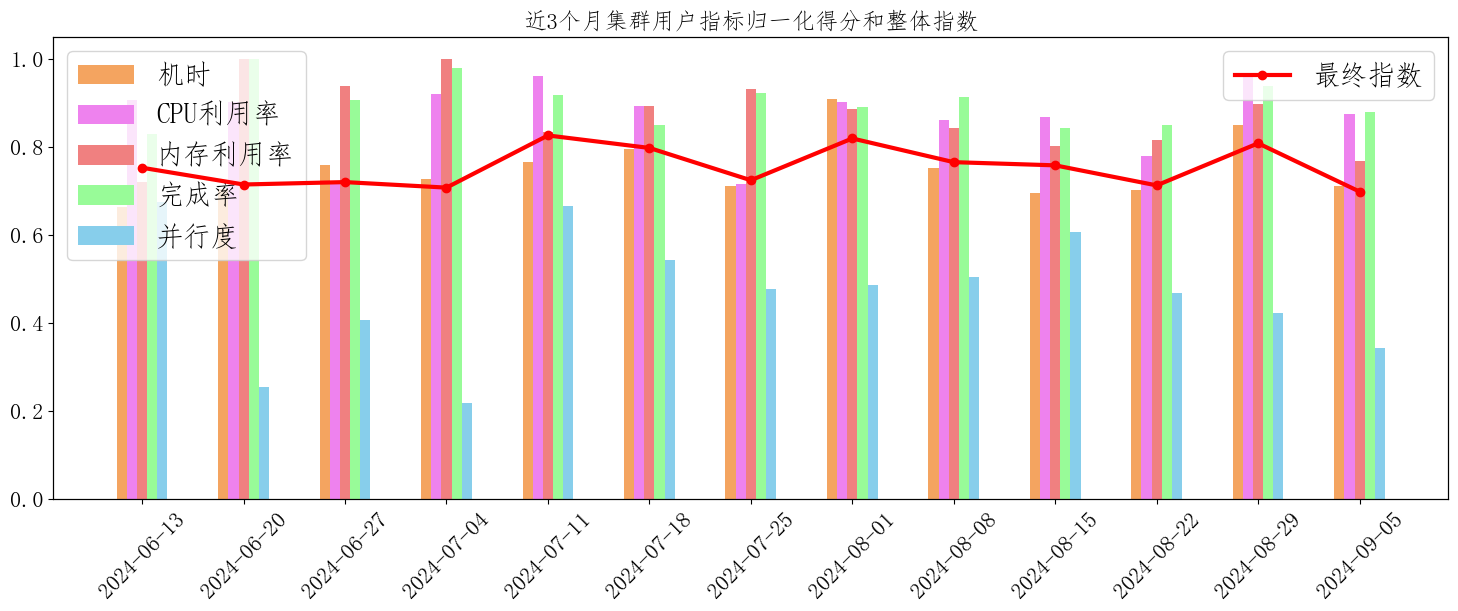

In [4]:
# 画出近3个月集群整体分数随时间变化图表

# 是否为周报版本
report = True

if report:
    columns = ["机时", "CPU利用率", "内存利用率", "完成率", "并行度"]
else:
    columns = ["size", "cpu", "mem", "comp", "para"]

df_1 = pd.read_csv(data_folder + "cluster/scores_cluster.csv")
df_1.set_index('date', inplace=True)
df_1 = df_1[-13:]

plt.figure(figsize=(18, 6))

colors = ['sandybrown', 'violet', 'lightcoral', 'palegreen', 'skyblue']
bar_width = 0.1  # 柱状图的宽度
index = np.arange(len(df_1))  # 获取日期索引

# # 柱状图
# plt.bar(index - bar_width, df_1['score_job']/100, bar_width, color=colors[0], label='机时')
# plt.bar(index, df_1['score_cpu_efficiency']/100, bar_width, color=colors[1], label='CPU利用率')
# plt.bar(index + bar_width, df_1['score_ncore']/100, bar_width, color=colors[4], label='并行度')

# # 柱状图，5指标
plt.bar(index - 2*bar_width, df_1['score_job']/100, bar_width, color=colors[0], label=columns[0])
plt.bar(index - 1*bar_width, df_1['score_cpu_efficiency']/100, bar_width, color=colors[1], label=columns[1])
plt.bar(index, df_1['score_memory_efficiency']/100, bar_width, color=colors[2], label=columns[2])
plt.bar(index + 1*bar_width, df_1['score_exception']/100, bar_width, color=colors[3], label=columns[3])
plt.bar(index + 2*bar_width, df_1['score_ncore']/100, bar_width, color=colors[4], label=columns[4])

# 添加图例
plt.legend(loc="upper left", fontsize="20")

# 设置x轴的标签旋转角度
plt.xticks(index, df_1.index, rotation=45, fontsize="16")
plt.ylim(0,1.05)
plt.yticks(fontsize="16")

# 创建第二个y轴
ax2 = plt.twinx()

# 在第二个y轴上绘制折线图
ax2.plot(df_1['score_final'], marker='o', color="red", label='最终指数', linewidth=3)

# 添加图例
plt.legend(loc="upper right", fontsize="20")

plt.ylim(0,105)
plt.yticks(fontsize="16")
plt.yticks([])

if report:
    plt.title("近3个月集群用户指标归一化得分和整体指数")

# 设置x轴的标签旋转角度
plt.xticks(rotation=45)

# 显示图形
plt.show()

In [ ]:
# 创建活跃用户的累积分布函数图

plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = False

date_new = "2024-07-18"
df = pd.read_csv(data_folder + date_new + "/scores_user.csv")
# display(df)

result_data = df[df['percentage']<=1]
result_cdf = result_data["score_final"]
result_cdf = result_cdf/100
count, bins_count = np.histogram(result_cdf, bins=100)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
cdf = np.append([0.0, 0.0], cdf)
bins_count = np.append([0.0], bins_count)
plt.plot(bins_count, cdf, label="CDF")

excellent = result_cdf.quantile(0.9)
good = result_cdf.quantile(0.75)
normal = min(df[df['score_final']!=0]['score_final'])/100
# display(excellent, good, normal)

plt.axvline(x=excellent, color='g', linestyle='--')
plt.text(x=excellent+0.01, y=0.72, s='优（前10%）', color='g', rotation=90)
plt.axvline(x=good, color='r', linestyle='--')
plt.text(x=good+0.01, y=0.58, s='良（前25%）', color='r', rotation=90)
plt.axvline(x=normal, color='black', linestyle='--')
plt.text(x=normal+0.01, y=0.1, s='中（所有活跃用户）', color='black', rotation=90)

plt.xlim(xmin = 0)
plt.ylim(ymin = 0)
plt.xlabel('用户作业水平指数')
plt.legend()
plt.show()

In [ ]:
# 对于指定用户，绘制指数随时间变化的图案

dates = ["2024-05-02", "2024-05-09", "2024-05-16", '2024-05-23', "2024-05-30", "2024-06-06", 
        "2024-06-13", "2024-06-20", "2024-06-27", "2024-07-04", "2024-07-11", "2024-07-18"]
names = ['S院T课题组','B院S课题组','M院Z课题组']
accounts = ['acct-trench','acct-bioxsyy','acct-mezyx']

final_result = pd.DataFrame()
for i in range(1,len(dates)):
    date_new = dates[i]
    result = pd.read_csv(data_folder + date_new + "/scores_user.csv")
    final_result = pd.concat([final_result,result])

del final_result['Unnamed: 0']

for i in range(0,len(names)):
    name = names[i]
    account = accounts[i]
    df_1 = final_result[final_result['account'] == account]
    df_1.set_index('date', inplace=True)
    # display(df_1)

    plt.figure(figsize=(18, 6))

    colors = ['sandybrown', 'violet', 'lightcoral', 'palegreen', 'skyblue']
    bar_width = 0.1  # 柱状图的宽度
    index = np.arange(len(df_1))  # 获取日期索引

    # # 柱状图，5指标
    plt.bar(index - 2*bar_width, df_1['score_job']/100, bar_width, color=colors[0], label='size')
    plt.bar(index - 1*bar_width, df_1['score_cpu_efficiency']/100, bar_width, color=colors[1], label='cpu')
    plt.bar(index, df_1['score_memory_efficiency']/100, bar_width, color=colors[2], label='mem')
    plt.bar(index + 1*bar_width, df_1['score_exception']/100, bar_width, color=colors[3], label='comp')
    plt.bar(index + 2*bar_width, df_1['score_ncore']/100, bar_width, color=colors[4], label='para')

    # 添加图例
    plt.legend(loc="upper left", fontsize="20")

    # 设置x轴的标签旋转角度
    plt.xticks(index, df_1.index, rotation=90, fontsize="16")
    plt.ylim(0,1.05)
    plt.yticks(fontsize="16")

    # 创建第二个y轴
    ax2 = plt.twinx()

    # 在第二个y轴上绘制折线图
    ax2.plot(df_1['score_final'], marker='o', color="red", label='最终指数', linewidth=3)

    # 添加图例
    plt.legend(loc="upper right", fontsize="20")

    plt.ylim(0,105)
    plt.yticks(fontsize="16")
    plt.yticks([])

    # 添加文字
    for i in index:
        plt.text(i, -35, '第' + str(int(df_1['rank'][i])) + '名', ha='center', fontsize = 16)
        plt.text(i, -42, df_1['level'][i], ha='center', fontsize = 16)

    # 添加标题
    plt.title(name, fontsize="20") 

    # 显示图形
    plt.show()

In [ ]:
# 对于单周数据，生成学院得分

date_new = "2024-07-18"
df = pd.read_csv(data_folder + date_new + "/scores_user.csv")

science = ['物理学院', '李所', '数学院', '自然研究院', '自科院', '分子中心', '化学化工学院', '致远学院', '化学院', '化工学院', '李政道院']
engineer = ['机动学院', '机械与动力工程学院', '船建学院', '密西根学院', '空天院', '溥渊', '材料学院', '材料科学与工程学院', '环境学院', '中英低碳', '海洋学院', '电信学院', '巴黎高科',
            '智慧能源创新学院', '溥渊未来技术学院', '网络安全学院', '电子信息与电气工程学院', '船舶海洋与建筑工程学院', '航空航天学院', '校友']
bio = ['生医工', '生命学院', '生命科学技术学院', 'Bio-X院', '农生学院', 'BioX院', '农业与生物学院', '系统生物医学研究院']
med = ['新华医院', '瑞金医院', '仁济医院', '医学院', '药学院', '第一人民医院', '转化医学院', '儿童医学中心', '系统院', '系统生医院', '第九医院','第九人民医院', 
       '转化医学', '第一医院', '第六医院', '第六人民医院', '胸科医院', '国际和平妇幼保健院']
other  = ['安泰学院', 0, '校友', '国务学院', '云南农业大学', '产研院', '分测中心', '中心', '继续教育学院', '高金学院', '计算部测试', '教学支撑', '文创学院', 
          'testldap', '图书馆', '外国语学院', '测试', '档案文博管理中心', '资产管理与实验室处', '中美物流研究院', '设计学院', '文科建设处']

result = df[df['percentage']<=1]
result['domain'] = result.apply(lambda row: '理' if row['department'] in science else '其他', axis=1)
result['domain'] = result.apply(lambda row: '工' if row['department'] in engineer else row['domain'], axis=1)
result['domain'] = result.apply(lambda row: '生' if row['department'] in bio else row['domain'], axis=1)
result['domain'] = result.apply(lambda row: '医' if row['department'] in med else row['domain'], axis=1)

department_score = result[['score_final', 'domain']]
department_score = department_score.groupby(['domain']).agg(['median', 'mean', 'max', 'min', 'count']).reset_index()
department_score.to_csv("../figures/department_20240718.csv", index=False)
display(department_score)